In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import concat
from scipy.spatial.distance import euclidean as dist

In [2]:
slice_1 = pd.DataFrame({'position':[900.0, 1200.0], 'height':[1.0, 0.5], 'width':[100.0, 150.0], 'time':[1, 1]})
slice_1 = slice_1[['position', 'height', 'width', 'time']]
slice_1

,position,height,width,time
0,900.0,1.0,100.0,1
1,1200.0,0.5,150.0,1


In [3]:
t2 = {'position':[900.0, 1250.0], 'height':[0.9, 0.5], 'width':[100.0, 150.0], 'time':[2, 2]}
slice_2 = pd.DataFrame(t2)
slice_2 = slice_2[['position', 'height', 'width', 'time']]

t3 = {'position':[900.0, 1300.0], 'height':[0.8, 0.5], 'width':[100.0, 150.0], 'time':[3, 3]}
slice_3 = pd.DataFrame(t3)
slice_3 = slice_3[['position', 'height', 'width', 'time']]

t4 = {'position':[900.0, 1350.0], 'height':[0.7, 0.5], 'width':[100.0, 150.0], 'time':[4, 4]}
slice_4 = pd.DataFrame(t4)
slice_4 = slice_4[['position', 'height', 'width', 'time']]

t5 = {'position':[900.0, 1400.0], 'height':[0.6, 0.5], 'width':[100.0, 150.0], 'time':[5, 5]}
slice_5 = pd.DataFrame(t5)
slice_5 = slice_5[['position', 'height', 'width', 'time']]
slice_5

,position,height,width,time
0,900.0,0.6,100.0,5
1,1400.0,0.5,150.0,5


In [5]:
# Create a list for each peak, starting with the first time slice
"""
The number of lists here will be dependent on the number of peaks
found in the first time slice. I will write a function to generate 
empty lists based on the input from peak fitting class.

The accompaning dataframe is used to organize the data for visualization
after sorting. These will also be generated by the function which makes
the lists.
"""
peak1_dist = [slice_1.loc[0]]
peak1_dist_df = pd.DataFrame()
peak2_dist = [slice_1.loc[1]]
peak2_dist_df = pd.DataFrame()

# Calculate the 3D euclidean distance between data points
# If the distance is small, that point is added to the previous peak's list
"""
Since we have 3 descriptors of our peaks - position, height, and width - we
can 'plot' these peaks as a single point in a 3D space. By calculating the 
3D euclidean distance between two points, we can determine if they are 'similar'
or close enough to be considered the same peak.

If they are similar enough, or within a certaint distance threshold, we append
that peak (and all of it's descriptors) to a list. This allows us to consolidate
peaks and separate them from peaks that are likely to be other features.
"""
def euc_dist(df1, df2):
    for i in range(len(df1)):
        for j in range(len(df2)):
            distance = dist(df1.loc[i][:-1], df2.loc[j][:-1])
# Need to make these if, elif statements more generic
            if ( i == 0 and distance <= 50 ):
                peak1_dist.append(df2.loc[j])
            elif ( i == 1 and distance <= 50):
                peak2_dist.append(df2.loc[j])
    return
euc_dist(slice_1, slice_2)

In [6]:
# Need to make wrapper function that runs 'euc_dist' across all time slices
# Something along the lines of 'slice_m, slice_n' where n=m+1
euc_dist(slice_2, slice_3)

In [7]:
euc_dist(slice_3, slice_4)

In [8]:
euc_dist(slice_4, slice_5)

In [9]:
# Tried to have this included in the euc_dist fucntion but pandas gave me trouble
# Might need to stay separate, but I'll make it run automatically
peak1 = pd.DataFrame(peak1_dist)
peak1

,position,height,width,time
0,900.0,1.0,100.0,1.0
0,900.0,0.9,100.0,2.0
0,900.0,0.8,100.0,3.0
0,900.0,0.7,100.0,4.0
0,900.0,0.6,100.0,5.0


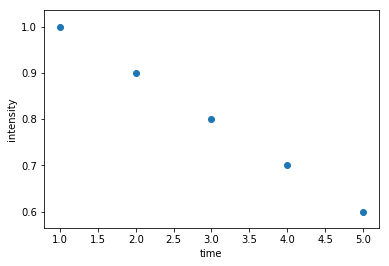

In [14]:
# Need to have this generate automatically, similar to generating the dataframe
# Need to have it fit the data with a decay and print that value/function
plt.scatter(peak1['time'], peak1['height'])
plt.xlabel('time')
plt.ylabel('intensity')
plt.show()

In [11]:
peak2 = pd.DataFrame(peak2_dist)
peak2

,position,height,width,time
1,1200.0,0.5,150.0,1.0
1,1250.0,0.5,150.0,2.0
1,1300.0,0.5,150.0,3.0
1,1350.0,0.5,150.0,4.0
1,1400.0,0.5,150.0,5.0


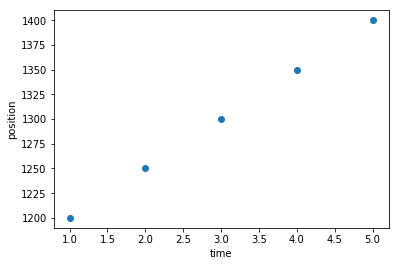

In [13]:
plt.scatter(peak2['time'], peak2['position'])
plt.xlabel('time')
plt.ylabel('position')
plt.show()

In [ ]:
peak1_dist_df = pd.DataFrame({'position':[], 'height':[], 'width':[], 'time':[]})
peak1_dist_df = peak1_dist_df[['position', 'height', 'width', 'time']]
peak2_dist_df = pd.DataFrame({'position':[], 'height':[], 'width':[], 'time':[]})
peak2_dist_df = peak2_dist_df[['position', 'height', 'width', 'time']]
def euc_dist(df1, df2):
    for i in range(len(df1)):
        for j in range(len(df2)):
            distance = dist(df1.loc[i][:-1], df2.loc[j][:-1])
# Need to make these if, elif statements more generic
            if ( i == 0 and distance <= 50 ):
                pd.concat([peak1_dist_df, df1.loc[i], df2.loc[j]], ignore_index=True)
            elif ( i == 1 and distance <= 50):
                peak2_dist_df.append([df1.loc[i], df2.loc[j]], ignore_index=True)
    return(peak1_dist_df, peak2_dist_df)

In [ ]:
slice_1

In [ ]:
slice_2

In [ ]:
peak1_dist_df

In [ ]:
test = []
test.append('distance':[0])

In [ ]:
peak1_dist